In [1]:
# Importing and Installing all required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import re

print("Pandas version: " + str(pd.__version__))
print("Numpy version: " + str(np.__version__))

Pandas version: 1.2.4
Numpy version: 1.20.1


In [2]:
# Importing the dataset here and getting an overview of the entire dataset.

try:
    
    # Defining new dataframes for each csv file to be read.
    df_Diabetic_Data = pd.read_csv('diabetic_data.csv')      # This file contains patient records. This is our main dataset.
    df_Ids_Mapping = pd.read_csv('IDs_mapping.csv')          # This file holds ID mappings of some features in our dataset.

    # Making a copy of original dataframes. Analysis will be done on these dataframes and not the original ones.
    df_Diabetic_Data_Copy = df_Diabetic_Data.copy()
    df_Ids_Mapping_Copy = df_Ids_Mapping.copy()

    # Making dimensions/overview of the dataset visible.
    print("OVERVIEW:")
    print("Number of Features: " + str(len(df_Diabetic_Data_Copy.columns)))
    print("Number of Records: " + str(len(df_Diabetic_Data_Copy.index)))
    print("Number of Duplicate Records: " + str(len(df_Diabetic_Data_Copy)-len(df_Diabetic_Data_Copy.drop_duplicates())))
    print("Total number of missing cells in entire DataFrame: " + str(df_Diabetic_Data_Copy.isnull().sum().sum()))
    print("Size in binary "+ str(round(df_Diabetic_Data_Copy.memory_usage(index=True).sum() * 0.00000095367432, 2)) + " MiB")
    

    
except FileNotFoundError:
    print("Oops! The file(s) could not be found in the memory. Please upload the file(s) in memory and try again.")



OVERVIEW:
Number of Features: 50
Number of Records: 101766
Number of Duplicate Records: 0
Total number of missing cells in entire DataFrame: 0
Size in binary 38.82 MiB


In [3]:
# lets see the dataset.
df_Diabetic_Data_Copy

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),[0-25),6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),[50-75),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),[100-125),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),[100-125),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Tranpose to have a better view of the dataset.

df_Diabetic_Data_Copy.T[df_Diabetic_Data_Copy.T.columns[0:4]]

,0,1,2,3
encounter_id,2278392,149190,64410,500364
patient_nbr,8222157,55629189,86047875,82442376
race,Caucasian,Caucasian,AfricanAmerican,Caucasian
gender,Female,Female,Female,Male
age,[0-10),[10-20),[20-30),[30-40)
weight,[0-25),[50-75),[100-125),[100-125)
admission_type_id,6,1,1,1
discharge_disposition_id,25,1,1,1
admission_source_id,1,7,7,7
time_in_hospital,1,3,2,2


In [5]:
# Here we replace values from admission_type_id column with their respective description given in IDs_Mapping file.

# Extracting mapping from IDs_mapping file and loading it in a dictionary.
admission_type_id_mapping = {}
for row in df_Ids_Mapping_Copy.head(8).itertuples():
    tuple_to_list = list(row)
    admission_type_id_mapping[str(tuple_to_list[1])] = str(tuple_to_list[2])
    
admission_type_id_mapping['6'] = "Unknown"

# Priting the ids and their description.
print(admission_type_id_mapping)
      

# Defining a function which will replace all the IDs with their description using the dictionary we created above.
def map_admission_id_description(id):
        df_Diabetic_Data_Copy["admission_type_id"].replace({id : admission_type_id_mapping.get(str(id))}, inplace = True)
    
# Calling the function above for each pair in the dictionary.            
for id in range(1, len(admission_type_id_mapping) + 1):
    map_admission_id_description(id)


{'1': 'Emergency', '2': 'Urgent', '3': 'Elective', '4': 'Newborn', '5': 'Not Available', '6': 'Unknown', '7': 'Trauma Center', '8': 'Not Mapped'}


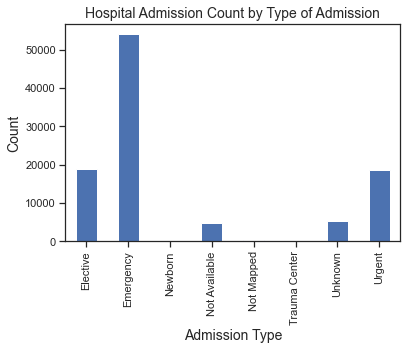

In [6]:
# Visualizing the Admission Type Feature.

df_Diabetic_Data_Copy.rename(columns= {'admission_type_id' : 'admission_type_desc'}, inplace = True)   # Renaming the column.
df_Diabetic_Data_Copy.groupby('admission_type_desc').size().plot(kind='bar')                           # Plotting a bar graph.
plt.ylabel('Count', fontsize=14)
plt.xlabel('Admission Type', fontsize=14)
plt.title("Hospital Admission Count by Type of Admission", fontsize=14)
plt.show()

# Inferences:
    1. Most of the patients were admitted in an emergency situation.
    2. Urgent care is the second most common admission situation.

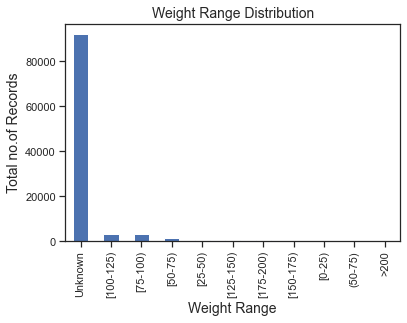

In [7]:
# Here, we deal with the weight - a categorical feature - feature in the dataset.

df_Diabetic_Data_Copy["weight"].replace({"?":"Unknown"}, inplace = True)   #Replace all '?' with 'Unknown'. 'Unknown' sounds more descriptive than'?'.'
df_Diabetic_Data_Copy['weight'].value_counts().plot(kind= "bar")           
plt.xlabel('Weight Range', fontsize = 14)
plt.ylabel('Total no.of Records', fontsize = 14)
plt.title("Weight Range Distribution", fontsize = 14)
plt.show()

# Inference:
    1. Weight of most of the patients is unknown.

In [8]:
''' Here, we deal with the 'Race' feature. This is a categorical feature.
    As seen in the output, there are invalid race entries.
    Dropping all rows with invalid race entries from the dataset to have cleaner data. '''

print(df_Diabetic_Data_Copy["race"].unique())
print("No.of invalid entries in Race feature: " + str(df_Diabetic_Data_Copy[df_Diabetic_Data_Copy["race"] == "?"].shape[1]))
try:
    df_Diabetic_Data_Copy.drop(df_Diabetic_Data_Copy.index[df_Diabetic_Data_Copy["race"] == "?"], inplace = True)
    print("Dropped all invalid entries.")
except CouldNotDrop:
    print("Drop operation failed.")
    


['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
No.of invalid entries in Race feature: 50
Dropped all invalid entries.


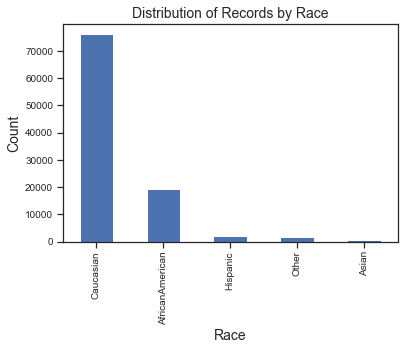

In [9]:
# Now that the invalid entries have been dropped, we can visaulize the 'Race' feature to gain more information.

df_Diabetic_Data_Copy['race'].value_counts().plot(kind="bar", fontsize=10)
plt.title('Distribution of Records by Race', fontsize = 14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Race', fontsize=14)
plt.show()

# Inferences:
    1. Around 75% of patients are Caucasians in our dataset.
    2. Asians is the least common race in the our dataset.

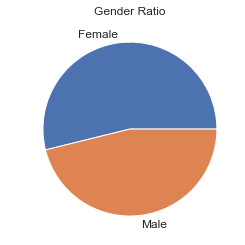

In [10]:
''' Dealing with the Gender feature here. 
    Again, this is a categorical feature and has some invalid entries.
    Dropping invalid entries and visualizing the feature. '''

df_Diabetic_Data_Copy.drop( df_Diabetic_Data_Copy.index[df_Diabetic_Data_Copy["gender"] == "Unknown/Invalid"], inplace = True )
df_Diabetic_Data_Copy['gender'].value_counts().plot(kind="pie", fontsize=12)
plt.title("Gender Ratio")
plt.ylabel(" ")
plt.show()

# Inference: 
We have more female patients than male patients in our dataset.

In [11]:
''' 
Payer code column is less relevant to the patient's information and also contains a lot of unknown values.
Therefore, dropping the feature entirely.  

'''

df_Diabetic_Data_Copy.drop(["payer_code"], axis =1, inplace = True)

In [12]:
# Renaming a few column headers for convenience. 

df_Diabetic_Data_Copy.rename(columns = {'diag_1'    : 'sugar_level_1',
                                       'diag_2'    : 'sugar_level_2',
                                       'diag_3'    : 'sugar_level_3',
                                       'A1Cresult' : 'HbA1c_Result' }, inplace = True)

df_Diabetic_Data_Copy.T[df_Diabetic_Data_Copy.T.columns[0:4]] # Viewing transpose of the dataset.

,0,1,2,3
encounter_id,2278392,149190,64410,500364
patient_nbr,8222157,55629189,86047875,82442376
race,Caucasian,Caucasian,AfricanAmerican,Caucasian
gender,Female,Female,Female,Male
age,[0-10),[10-20),[20-30),[30-40)
weight,[0-25),[50-75),[100-125),[100-125)
admission_type_desc,Unknown,Emergency,Emergency,Emergency
discharge_disposition_id,25,1,1,1
admission_source_id,1,7,7,7
time_in_hospital,1,3,2,2


In [13]:
''' 
Here we deal with sugar_level columns.
There are three such columns which indicate patient's sugar level reading taken at different intervals during the treatment.
These columns contains few invalid (non-numeric) entries.
We will get rid of them and convert the feature to numerical feature. 
'''

# Performing above mentioned actions on 'sugar_level_1' feature. Using Regular Expression to find invalid entries.
df_Diabetic_Data_Copy.drop(df_Diabetic_Data_Copy[~df_Diabetic_Data_Copy.sugar_level_1.str.contains(r'^[0-9]\d*(\.\d+)?$')].index, inplace = True)
df_Diabetic_Data_Copy['sugar_level_1'] = pd.to_numeric(df_Diabetic_Data_Copy['sugar_level_1'], errors='coerce')

# On 'sugar_level_2' feature.
df_Diabetic_Data_Copy.drop(df_Diabetic_Data_Copy[~df_Diabetic_Data_Copy.sugar_level_2.str.contains(r'^[0-9]\d*(\.\d+)?$')].index, inplace = True)
df_Diabetic_Data_Copy['sugar_level_2'] = pd.to_numeric(df_Diabetic_Data_Copy['sugar_level_2'], errors='coerce')

# On 'sugar_level_3' feature.
df_Diabetic_Data_Copy.drop(df_Diabetic_Data_Copy[~df_Diabetic_Data_Copy.sugar_level_3.str.contains(r'^[0-9]\d*(\.\d+)?$')].index, inplace = True)
df_Diabetic_Data_Copy['sugar_level_3'] = pd.to_numeric(df_Diabetic_Data_Copy['sugar_level_3'], errors='coerce')

df_Diabetic_Data_Copy.T[df_Diabetic_Data_Copy.T.columns[0:4]]
#df_Diabetic_Data_Copy.to_csv('Diabetes_changed.csv', index = False)

C:\Users\omkar\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,1,3,4,5
encounter_id,149190,500364,16680,35754
patient_nbr,55629189,82442376,42519267,82637451
race,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Male,Male,Male
age,[10-20),[30-40),[40-50),[50-60)
weight,[50-75),[100-125),Unknown,Unknown
admission_type_desc,Emergency,Emergency,Emergency,Urgent
discharge_disposition_id,1,1,1,1
admission_source_id,7,7,7,2
time_in_hospital,3,2,1,3


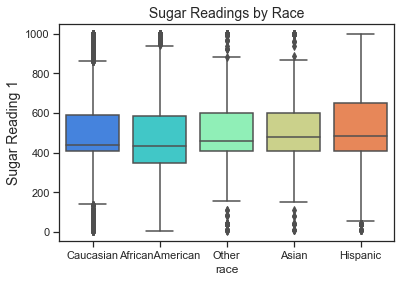

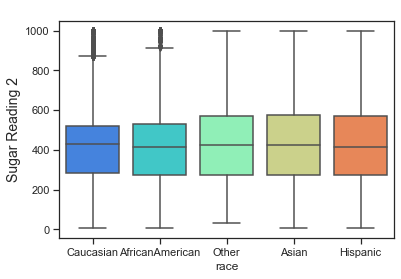

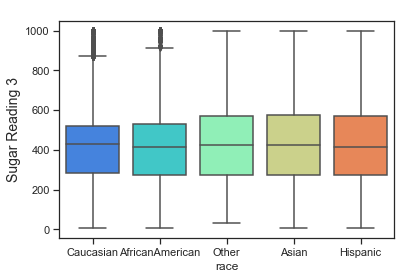

In [14]:
# Finding outliers in sugar level features.

sns.boxplot(x = 'race', y ='sugar_level_1', data = df_Diabetic_Data_Copy, palette = 'rainbow')
plt.title(" Sugar Readings by Race ", fontsize = 14)
plt.ylabel("Sugar Reading 1", fontsize= 14)
plt.show()

sns.boxplot(x = 'race', y ='sugar_level_2', data = df_Diabetic_Data_Copy, palette = 'rainbow')
plt.title(" ")
plt.ylabel("Sugar Reading 2", fontsize= 14)
plt.show()

sns.boxplot(x = 'race', y ='sugar_level_2', data = df_Diabetic_Data_Copy, palette = 'rainbow')
plt.title(" ")
plt.ylabel("Sugar Reading 3", fontsize= 14)
plt.show()

# Inference:
    1. Sugar Level 1 reading ranges from 400-600 across all races.
    2. Caucasian races has more outlier values across different sugar level readings.
    

In [15]:
# Here, we replace all '?' with 'Unknown' in medical_speciality feature. 

df_Diabetic_Data_Copy["medical_specialty"].replace({"?":"Unknown"}, inplace = True)

In [16]:
# Now that we are done cleaning the data, lets take a look at dimensions
df_Diabetic_Data_Copy.shape

(89781, 49)

# Exploring Correlations

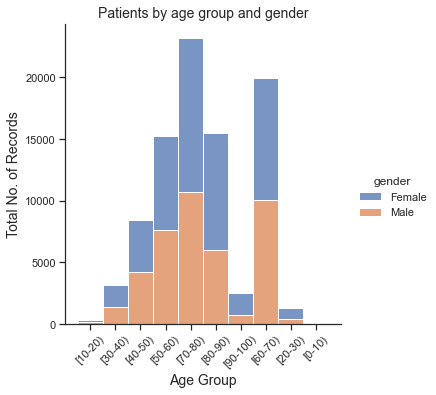

In [17]:
# Which age group has more patients admitted to the hospital?

sns.displot(df_Diabetic_Data_Copy, x="age", hue="gender", multiple="stack")
plt.ylabel('Total No. of Records', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.xticks(rotation = 45)
plt.title("Patients by age group and gender", fontsize=14)
plt.show()

# Inferences:
    1. Age group [70-80] has maximum number of patients admitted to the hospital.
    2. Age group [60-70] is second most affected age group.

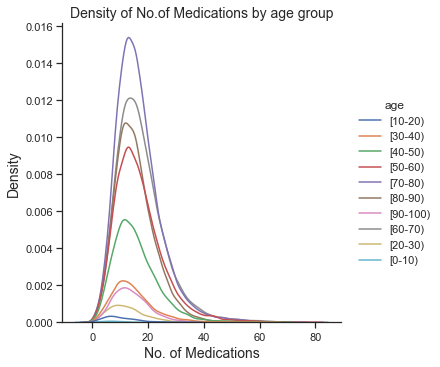

In [18]:
# Here we plot density of No.of medications (numerical feature) across age groups.

sns.displot(df_Diabetic_Data_Copy, x="num_medications", hue="age", kind="kde")
plt.ylabel('Density', fontsize=14)
plt.xlabel('No. of Medications', fontsize=14)
plt.title("Density of No.of Medications by age group", fontsize=14)
plt.show()

# Inferences:
    1. Age group [70-80] tend have consume more number of medications than any other age group.

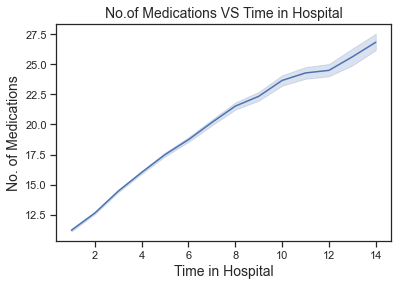

In [19]:
# Here we see correlation between two numerical features: num_medications and time_in_hospital.

sns.lineplot(x = 'time_in_hospital', y = 'num_medications',  data = df_Diabetic_Data_Copy)
plt.title("No.of Medications VS Time in Hospital", fontsize=14)
plt.xlabel("Time in Hospital", fontsize = 14)
plt.ylabel("No. of Medications", fontsize = 14)
plt.show()

# Inference:
    1. There is positive monotic correlation between two features.
    2. Meaning, if the patient is already on more number of medications, its highly likely that the patient will spend more      time in hospital.

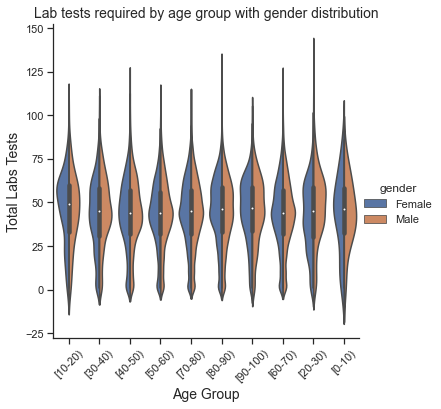

In [20]:
# Here we find correlation between age, num_lab_procedure and gender features. 

sns.catplot(x = "age", y="num_lab_procedures", hue= "gender", kind="violin", split=True, data = df_Diabetic_Data_Copy)
plt.xticks(rotation=45)
plt.ylabel('Total Labs Tests', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.title("Lab tests required by age group with gender distribution", fontsize = 14)
plt.show()

# Inferences:
    1. Men in age group [20-30] and [30-40] needed more lab test than women in same age group.
    2. Age group [20-30] required more procedures than any other age group.

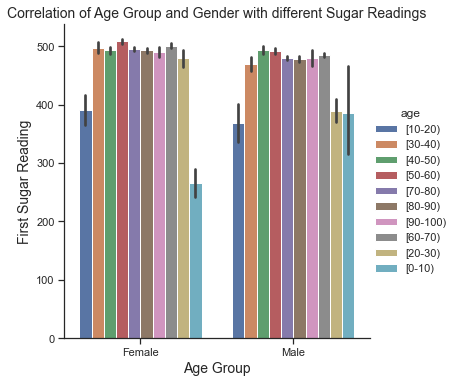

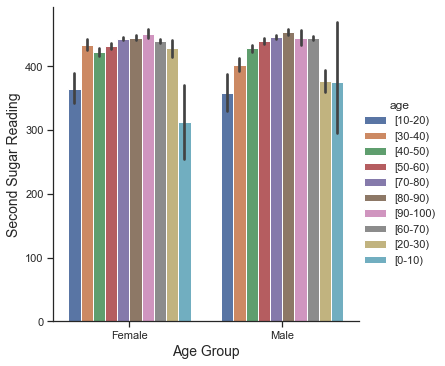

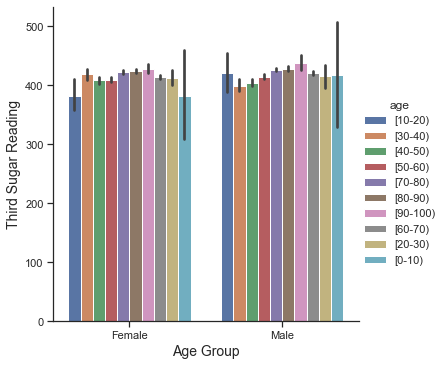

In [21]:
# Here we find correlation between different sugar level readings grouped by gender and further differentiated based on age group.

sns.catplot(x="gender", y="sugar_level_1", hue="age", kind = "bar", data=df_Diabetic_Data_Copy)
plt.ylabel('First Sugar Reading', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.title("Correlation of Age Group and Gender with different Sugar Readings", fontsize = 14)
plt.show()

sns.catplot(x="gender", y="sugar_level_2", hue="age", kind = "bar", data=df_Diabetic_Data_Copy)
plt.ylabel('Second Sugar Reading', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show()

sns.catplot(x="gender", y="sugar_level_3", hue="age", kind = "bar", data=df_Diabetic_Data_Copy)
plt.ylabel('Third Sugar Reading', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show()

# Inferences: 
    1. The sugar levels tend to drop within first day of admission. 
    2. The most treatment-ineffective age group is [10-20] in females.
    3. The most treatment-ineffective age group is [0-10] in males.
            

# Chi - Square Test:
    This test helps us find correlation between two categorical features.
    We make an assumption that two features are not correlated.
    Then we find the probability of the assumption being true. If probability is less 0.05, our assumption is wrong. 

In [22]:
# Performing chisq test to evaluate correlation between 'HbA1c_Result' feature with 'readmitted' feature.

from scipy.stats import chi2_contingency 

ctr = pd.crosstab(index = df_Diabetic_Data_Copy['HbA1c_Result'], columns = df_Diabetic_Data_Copy['readmitted'])
res = chi2_contingency(ctr)
if res[1] < 0.05 :
    print("P-value is less than 0.05. Which means given two features are highly CORRELATED with each other.")
else:
    print("P-value is more than 0.05. Which means our assumption is true and given two features are NOT CORRELATED.")



P-value is less than 0.05. Which means given two features are highly CORRELATED with each other.


# Inference:
    1. From above test, we can conclude that higher the HbA1c Result, more are the chances that patient will be readmitted  to the hospital in less than 30 days.

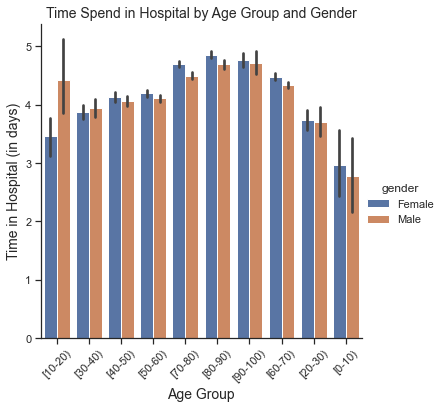

In [23]:
# Lets see what information features like gender, age group and time spend in hospital give us.

sns.catplot(x="age", y="time_in_hospital", hue="gender", kind = "bar", data=df_Diabetic_Data_Copy)
plt.title("Time Spend in Hospital by Age Group and Gender", fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Time in Hospital (in days)', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show()

# Inference: 
    1. Diabetic women tend to spend more time in hospital than diabetic men across age groups

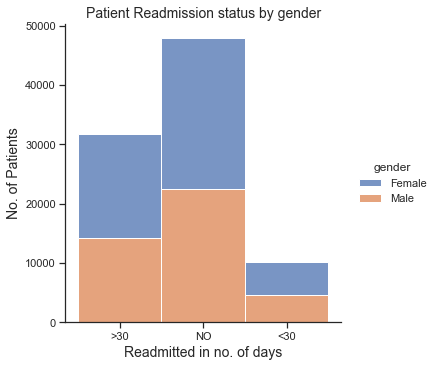

In [24]:
# Here we plot and see how many patients were readmitted. We will try and get gender based information here.

sns.displot(df_Diabetic_Data_Copy, x="readmitted", hue="gender", multiple="stack")
plt.title("Patient Readmission status by gender", fontsize = 14)
plt.xlabel("Readmitted in no. of days", fontsize=14)
plt.ylabel("No. of Patients", fontsize=14)
plt.show()


# Inferences:
    1. Majority of patients once admitted were not readmitted.
    2. Patients who were readmitted most in more than 30 days were women. 
    

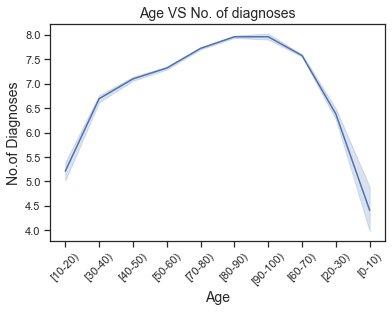

In [25]:
# Lets discover how age and number of diagnoses are correlated.

sns.lineplot(x = 'age', y = 'number_diagnoses',  data = df_Diabetic_Data_Copy)
plt.title("Age VS No. of diagnoses", fontsize=14)
plt.xlabel("Age", fontsize = 14)
plt.xticks(rotation=45)
plt.ylabel("No.of Diagnoses", fontsize = 14)
plt.show()

# Inference:
    1. Patients in the age group [90-100] were diagnosed with maximum number of illness
    2. Steep increase in illness in patients from age 30.
    3. Patients in age group 0-30 were diagnosed with least number of illness.

outlier on number of outpatient visits and number of medications


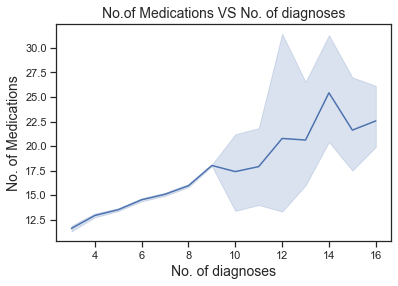

In [26]:
# Here we analyze the impact of no.of medications on no.of diagnoses.

sns.lineplot(y = 'num_medications', x = 'number_diagnoses',  data = df_Diabetic_Data_Copy)
plt.title("No.of Medications VS No. of diagnoses", fontsize=14)
plt.xlabel("No. of diagnoses", fontsize = 14)
plt.ylabel("No. of Medications", fontsize = 14)
plt.show()

# Inference:
    1. Both features are directly proportinal to each other.

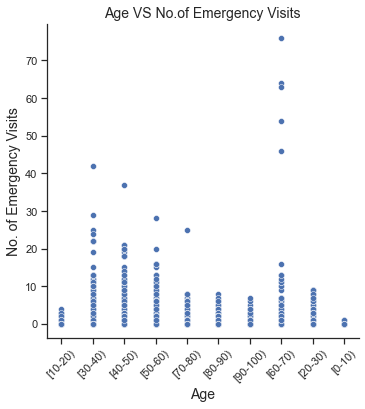

In [27]:
# Age VS No.of Emergency Visits at the hospital. 

sns.relplot(x="age", y="number_emergency", data=df_Diabetic_Data_Copy)
plt.title("Age VS No.of Emergency Visits", fontsize = 14)
plt.xlabel("Age", fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel("No. of Emergency Visits", fontsize = 14)
plt.show()

# Inference:
    1. Age group [30-40] seem to have more emergency visits than any other age group.
    

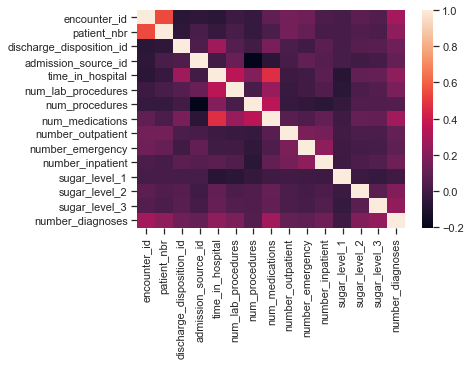

In [28]:
'''
Spearman's Correlation. This basically finds correlation between all numerical features in the dataset.
We can use this heatmap to confirm our inferences drawn.
For instance, No. of Medication and Time in Hospital.
''' 

corre = df_Diabetic_Data_Copy.corr(method = 'spearman')
sns.heatmap(corre, annot = False)
plt.show()

# Important Conclusions Drawn from EDA:
    1. Patient's HbA1c result contributes significantly to patient's readmission status.
    2. Age group [70-80] tend have consume more number of medications than any other age group.
    3. Average Blood sugar level of patients is in the range of (450 - 600) mg/dl.
    4. Diabetic women spend more time in hospital than diabetic men across age groups.
    5. Patients start showing illness symptoms from age of 30.